# Load Library and Data

In [165]:
library(plyr)
library(Rcpp)
library(IRdisplay)

# Initial Examination

In [166]:
clientdf <- read.csv('cliente_tabla.csv', header = T)
print(typeof(clientdf))
print(head(clientdf))

[1] "list"
  Cliente_ID                           NombreCliente
1          0                              SIN NOMBRE
2          1                        OXXO XINANTECATL
3          2                              SIN NOMBRE
4          3                               EL MORENO
5          4 SDN SER  DE ALIM  CUERPO SA CIA  DE INT
6          4    SDN SER DE ALIM CUERPO SA CIA DE INT


In [167]:
print(nrow(clientdf))

[1] 935362


# Cleaning

## Duplicated ID

In [168]:
IDcounts <- as.data.frame(count(clientdf, 'Cliente_ID'))

ID counts is a table with Cliente_ID and how many times an ID appears in the table. You can see that Cliente_ID 4 appeared twice and the NombreCliente are the basically the same save the length of some white space. 

I'll single out the duplicated ones and see if they all have the same symptom.

In [169]:
print(head(IDcounts))

  Cliente_ID freq
1          0    1
2          1    1
3          2    1
4          3    1
5          4    2
6          5    1


In [170]:
duplicateID <- IDcounts[IDcounts$freq > 1,]
print(head(duplicateID))
print(nrow(duplicateID))

    Cliente_ID freq
5            4    2
62         262    2
63         465    2
77        1589    2
94        2033    2
403       2858    2
[1] 4862


## Also Duplicated Name?

So there are 4862 of them and I'm not sure if I can examin them all and make sure they represent duplicated client names...

OK, since the problem are the white space, I'll just get rid of them. I can't read Spanish anyways, so with or without space doesn't really matter...

Create another column named 'LinkedName' to store the NombreCliente without white spaces

In [171]:
clientdf$LinkedName <- gsub('[ ]',"", clientdf$NombreCliente)

In [172]:
print(head(clientdf))

  Cliente_ID                           NombreCliente
1          0                              SIN NOMBRE
2          1                        OXXO XINANTECATL
3          2                              SIN NOMBRE
4          3                               EL MORENO
5          4 SDN SER  DE ALIM  CUERPO SA CIA  DE INT
6          4    SDN SER DE ALIM CUERPO SA CIA DE INT
                    LinkedName
1                    SINNOMBRE
2              OXXOXINANTECATL
3                    SINNOMBRE
4                     ELMORENO
5 SDNSERDEALIMCUERPOSACIADEINT
6 SDNSERDEALIMCUERPOSACIADEINT


Now let's find the duplicated names

In [173]:
NameCount <- as.data.frame(count(clientdf, 'LinkedName'))
duplicateName <- NameCount[NameCount$freq > 1,]

In [174]:
print(head(duplicateName))
print(nrow(duplicateName))

   LinkedName freq
12 100NATURAL    2
35  10DEABRIL    4
36  10DEJUNIO    2
37   10DEMAYO   10
40 10HERMANOS    3
44     10UNOS    3
[1] 39251


There are way more duplicated linked names than I expected! 10DEMAYO appeared 10 times???

In [175]:
print(clientdf[clientdf$LinkedName == '10DEMAYO',])

       Cliente_ID NombreCliente LinkedName
123896     306967    10 DE MAYO   10DEMAYO
168701     432945    10 DE MAYO   10DEMAYO
203554     552012    10 DE MAYO   10DEMAYO
222110     610732    10 DE MAYO   10DEMAYO
333161    1177132    10 DE MAYO   10DEMAYO
340042    1212036    10 DE MAYO   10DEMAYO
380568    1442870    10 DE MAYO   10DEMAYO
496514    2041456    10 DE MAYO   10DEMAYO
915659    7737767    10 DE MAYO   10DEMAYO
934869    9708580    10 DE MAYO   10DEMAYO


Werid, their ID are different but their name are the same, I wonder if their demands are the same too.
Here is the data for ClienteID == 306967 in week 3:

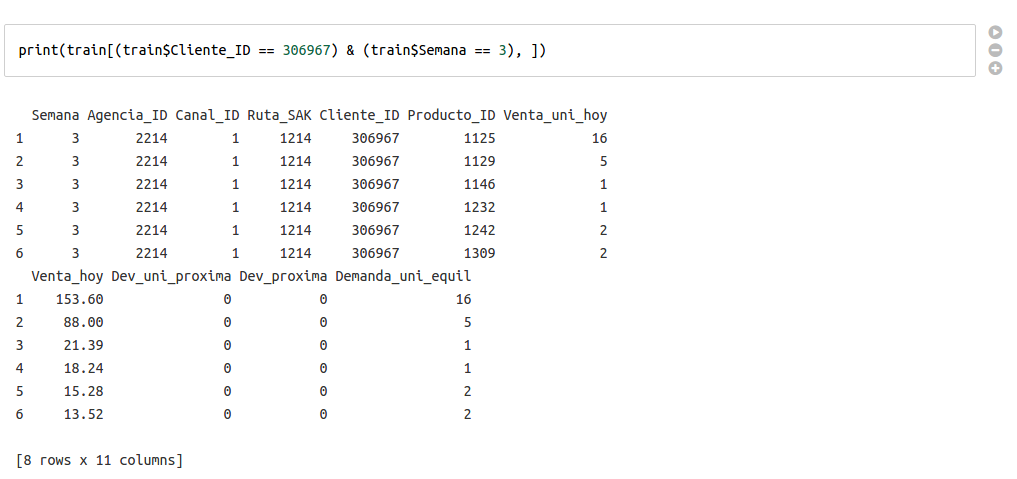

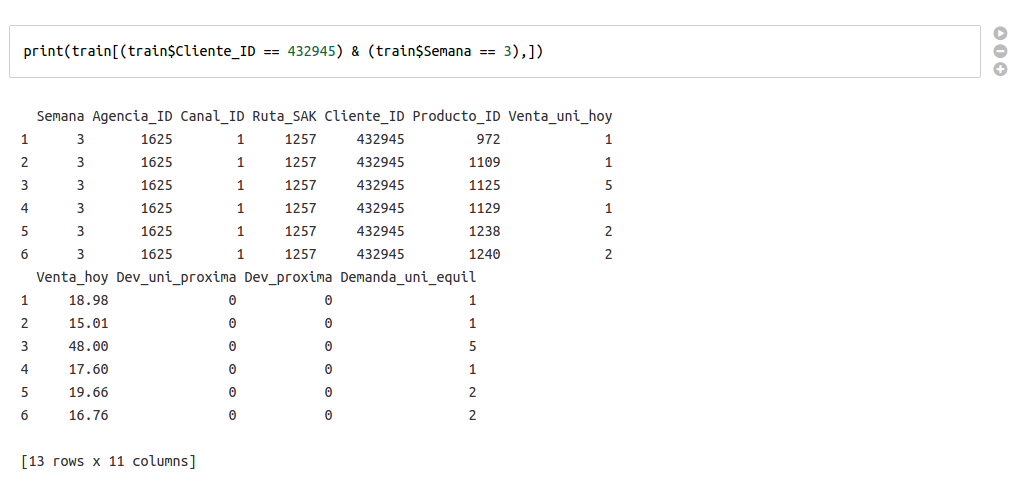

In [176]:
display_png(file = "306967week3.png")
display_png(file="432945week3.png")

They are clearly different! 

# Cleaning up

Let's first deal with the duplicated ID, write a for loop based on the duplicatedID, if the corresponding LinkedName in clientdf are the same then we delete the second accurence of the clientID along with that whole row.

In [177]:
# # Create a column indicate duplicate or not
# clientdf$Duplicate <- FALSE

In [178]:
# for (id in duplicateID$Cliente_ID){
#     # print(id)
#     idx1 = which(clientdf$Cliente_ID == id)[1] # Get the index of the first occurrence of this Cliente_ID
#     idx2 = which(clientdf$Cliente_ID == id)[2] # Get the index of the second occurrence of this Cliente_ID 
#     if ((clientdf[idx1,c('LinkedName')] == clientdf[idx2,c('LinkedName')]) & 
#         (id %in% clientdf$Cliente_ID))
#         # Check if their corresponding LinkedName are the same
        
#         # If same, then assign TRUE to the Duplicate column of the first occurrence
#         clientdf[idx1,c('Duplicate')] = TRUE
    
# }
# # This took a long time, I will improve it later.
# print(head(clientdf))

In [179]:
# clientdf_rem_dupID <- clientdf[!clientdf$Duplicate,]

In [180]:
# print(head(clientdf_rem_dupID))

In [181]:
# clientdf_rem_dupID$Duplicate <- NULL
# clientdf_rem_dupID$LinkedName <- NULL
# clientdf_rem_dupID <- clientdf_rem_dupID[c('Cliente_ID', 'NombreCliente')]
# print(head(clientdf_rem_dupID))

The for loop too a long time. For practical purposes, we'll just delete the duplicates of all rows that has duplicate Cliente_ID.

In [182]:
# Take the row names of the data frame duplicateID
idx_duplicateID <- as.list(row.names(duplicateID))
# Delete the corresponding rows
cliente_tabla_remDupID <- clientdf[!rownames(clientdf) %in% idx_duplicateID,c('Cliente_ID', 'NombreCliente')]

# Write clientdf_rem_dupID to CSV

In [183]:
write.csv(cliente_tabla_remDupID, "cliente_tabla_remDupID.csv", row.names = FALSE)